![anatomy](figs/anatomy.png)

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.0.0'

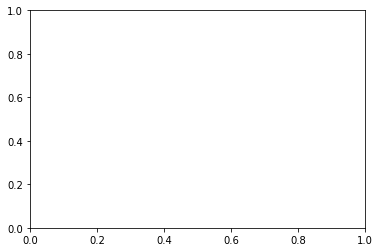

In [7]:
fig1, ax = plt.subplots()

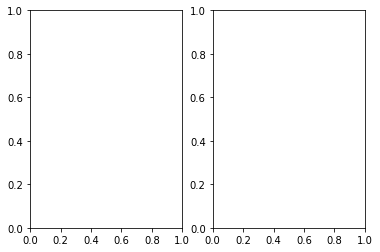

In [8]:
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

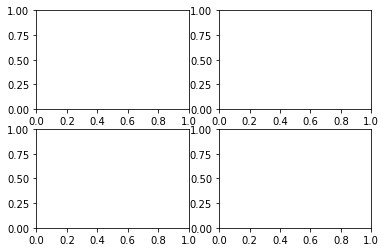

In [10]:
fig2, axes = plt.subplots(nrows=2, ncols=2)

In [13]:
ls data

NEH_Evaluators.csv     NEH_Grants1980s.csv    NEH_Grants2010s.csv
NEH_Grants1960s.csv    NEH_Grants1990s.csv    NEH_StateCouncils.csv
NEH_Grants1970s.csv    NEH_Grants2000s.csv    gc.csv


In [15]:
import pandas as pd
pd.__version__

'0.19.2'

In [108]:
df = pd.read_csv("data/NEH_Grants2010s.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5911 entries, 0 to 5910
Data columns (total 31 columns):
Unnamed: 0           5911 non-null int64
AppNumber            5911 non-null object
ApplicantType        5911 non-null object
ApprovedMatching     5911 non-null float64
ApprovedOutright     5911 non-null float64
AwardMatching        5911 non-null float64
AwardOutright        5911 non-null float64
BeginGrant           5911 non-null object
CouncilDate          5911 non-null object
Discipline           5857 non-null object
DisciplineCount      5911 non-null int64
Division             5911 non-null object
EndGrant             5911 non-null object
InstCity             5911 non-null object
InstCountry          5911 non-null object
InstPostalCode       5911 non-null object
InstState            5911 non-null object
Institution          5911 non-null object
OrganizationType     5911 non-null object
OriginalAmount       5911 non-null float64
Participant          5357 non-null object
Particip

In [110]:
#lets see what data is suited to what graph
# object so we only get string data 
df.describe(include=['object'])

,AppNumber,ApplicantType,BeginGrant,CouncilDate,Discipline,Division,EndGrant,InstCity,InstCountry,InstPostalCode,InstState,Institution,OrganizationType,Participant,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,ToSupport
count,5911,5911,5911,5911,5857,5911,5911,5911,5911,5911,5911,5911,5911,5357,5911,5911,5911,5911,168,5911
unique,5374,2,113,27,1193,8,149,943,12,1964,58,1929,42,4886,146,77,2548,4713,155,3856
top,SO-253355-17,O,2016-06-01T00:00:00,2016-03-03,"{'Name': 'Interdisciplinary Studies, General'}",Research Programs,2016-07-31T00:00:00,New York,USA,22903-4833,NY,Unaffiliated Independent Scholar,University,"{'Firstname': 'Adam', 'Lastname': 'Criblez', '...",U.S. History,Preservation Assistance Grants,{},State Humanities Program,"{'SupplementDate': '2011-05-16T00:00:00', 'Out...",{}
freq,4,4271,232,709,720,2020,215,383,5839,53,776,61,1736,4,956,763,3111,146,8,1420


In [111]:
# only 2 applicant types, so perfect for pie chart
#I = individual, O = organization

freq = df['ApplicantType'].value_counts()
freq

O    4271
I    1640
Name: ApplicantType, dtype: int64

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


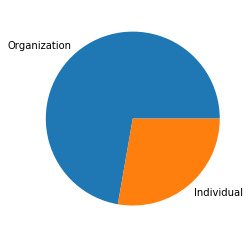

In [112]:
fig, ax = plt.subplots()
ax.pie(freq, labels=['Organization', 'Individual'])
ax.set_aspect('equal')
fig.show()

In [113]:
# bar graph?

freq = df['Division'].value_counts()
freq

Research Programs            2020
Preservation and Access      1438
Education Programs            869
Public Programs               867
Digital Humanities            346
Federal/State Partnership     202
Challenge Grants              165
Agency-wide Projects            4
Name: Division, dtype: int64

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


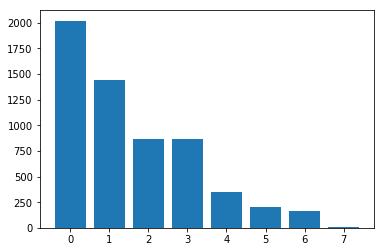

In [114]:
fig, ax = plt.subplots()

index = range(0, freq.shape[0])
ax.bar(index, freq)
fig.show()

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


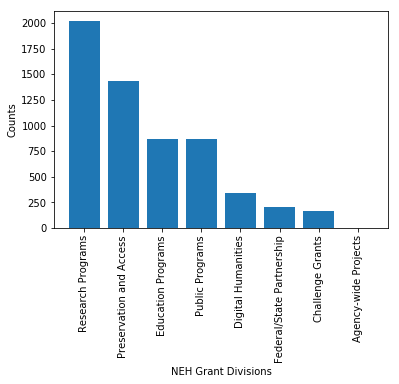

In [115]:
fig, ax = plt.subplots()

index = range(0, freq.shape[0])
ax.bar(index, freq)
ax.set_xticks(index)
ax.set_xticklabels(freq.keys(), rotation=90)
ax.set_ylabel("Counts")
ax.set_xlabel("NEH Grant Divisions")
fig.show()

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


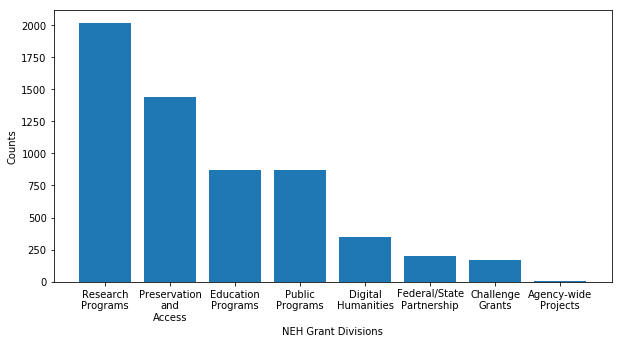

In [116]:
import matplotlib.ticker as mticker


def major_formatter(x, pos):
    """x is the index position"""
    label = freq.keys()[x]
    label = label.replace(" ", "\n")
    return label

fig, ax = plt.subplots(figsize=(10,5))

index = range(0, freq.shape[0])
ax.bar(index, freq)
ax.set_xticks(index)
ax.set_ylabel("Counts")
ax.set_xlabel("NEH Grant Divisions")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(major_formatter))
fig.show()

In [117]:
# what about quantative oriented plots?
df.describe()

,Unnamed: 0,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,DisciplineCount,OriginalAmount,ParticipantCount,SupplementAmount,SupplementCount,YearAwarded
count,5911.000000,5911.000000,5.911000e+03,5911.000000,5.911000e+03,5911.000000,5.911000e+03,5911.000000,1.680000e+02,5911.000000,5911.000000
mean,2955.000000,13728.388090,1.312964e+05,11422.476026,1.252006e+05,1.459651,1.202839e+05,1.083065,8.579235e+05,0.046354,2013.263746
std,1706.503052,70809.903549,3.622135e+05,63326.405528,3.129725e+05,0.809433,1.978205e+05,0.614574,8.659277e+05,0.287147,2.287382
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-3.500000e+05,0.000000,5.600000e+02,0.000000,2010.000000
25%,1477.500000,0.000000,6.000000e+03,0.000000,6.000000e+03,1.000000,6.000000e+03,1.000000,1.399125e+04,0.000000,2011.000000
50%,2955.000000,0.000000,5.040000e+04,0.000000,5.040000e+04,1.000000,5.040000e+04,1.000000,6.858650e+05,0.000000,2013.000000
75%,4432.500000,0.000000,1.590765e+05,0.000000,1.557235e+05,2.000000,1.750000e+05,1.000000,1.366935e+06,0.000000,2016.000000
max,5910.000000,750000.000000,8.711590e+06,750000.000000,6.544450e+06,5.000000,4.422010e+06,6.000000,4.405680e+06,3.000000,2017.000000


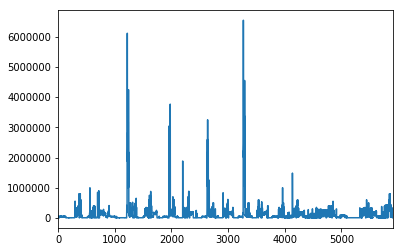

In [118]:
fig, ax = plt.subplots()
df['AwardOutright'].plot(ax=ax)

In [119]:
#time series, yes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5911 entries, 0 to 5910
Data columns (total 31 columns):
Unnamed: 0           5911 non-null int64
AppNumber            5911 non-null object
ApplicantType        5911 non-null object
ApprovedMatching     5911 non-null float64
ApprovedOutright     5911 non-null float64
AwardMatching        5911 non-null float64
AwardOutright        5911 non-null float64
BeginGrant           5911 non-null object
CouncilDate          5911 non-null object
Discipline           5857 non-null object
DisciplineCount      5911 non-null int64
Division             5911 non-null object
EndGrant             5911 non-null object
InstCity             5911 non-null object
InstCountry          5911 non-null object
InstPostalCode       5911 non-null object
InstState            5911 non-null object
Institution          5911 non-null object
OrganizationType     5911 non-null object
OriginalAmount       5911 non-null float64
Participant          5357 non-null object
Particip

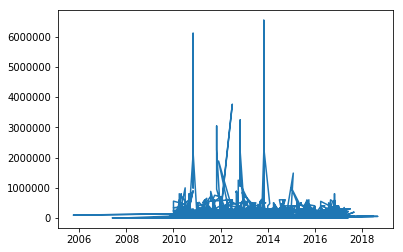

In [120]:
fig, ax = plt.subplots()
ax.plot_date(df['BeginGrant'], df['AwardOutright'], '-')

In [121]:
#lets sort on date first
ds = df.sort( columns=["BeginGrant"])


/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


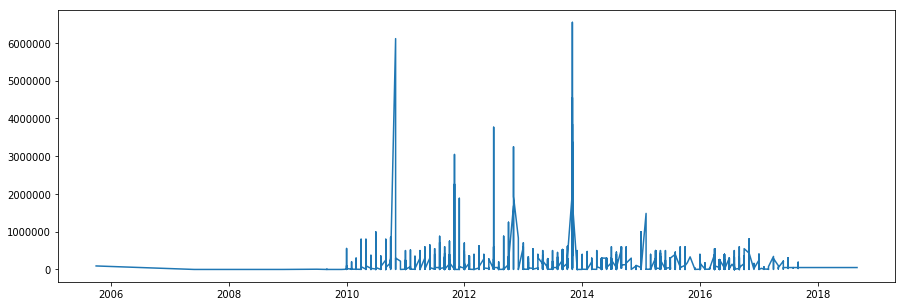

In [122]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['BeginGrant'], ds['AwardOutright'], '-')

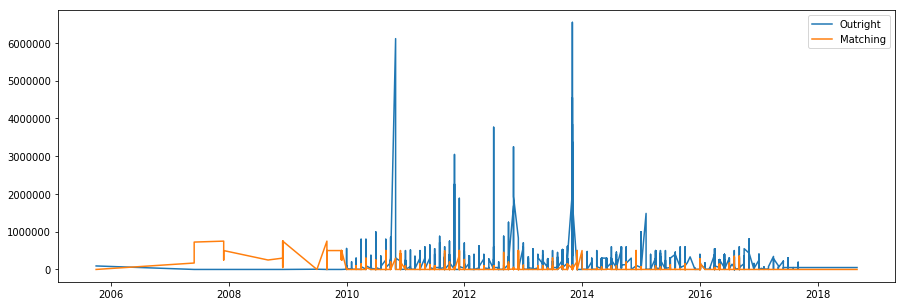

In [123]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['BeginGrant'], ds['AwardOutright'], '-', label="Outright")
ax.plot_date(ds['BeginGrant'], ds['AwardMatching'], '-', label="Matching")
ax.legend()

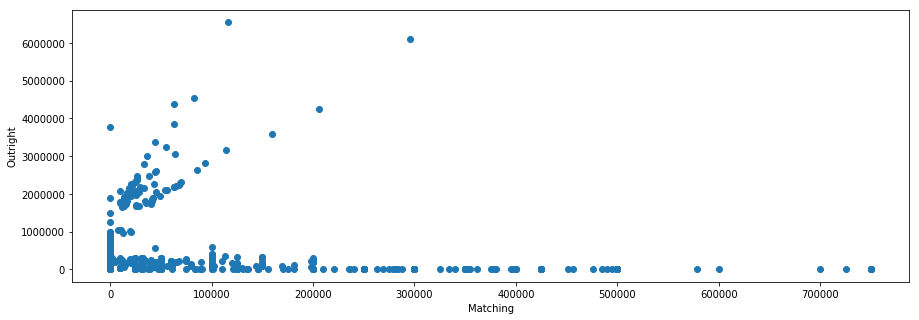

In [125]:
# compare the two?
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df['AwardMatching'], df['AwardOutright'])
ax.set_xlabel("Matching")
ax.set_ylabel("Outright")

In [131]:
df[["AwardMatching", "AwardOutright"]].corr()

,AwardMatching,AwardOutright
AwardMatching,1.000000,0.036687
AwardOutright,0.036687,1.000000


In [143]:
# what about more complicated relationships?

apdiv = df.groupby(["InstCountry", "Division"]).sum()
apdiv.head()

Unnamed: 0  ApprovedMatching  \
InstCountry Division                                                
Canada      Preservation and Access       19578          540000.0   
            Research Programs             23834               0.0   
China       Research Programs             15696               0.0   
France      Research Programs              7549               0.0   
Germany     Research Programs              1868               0.0   

                                     ApprovedOutright  AwardMatching  \
InstCountry Division                                                   
Canada      Preservation and Access          540000.0       540000.0   
            Research Programs                373200.0            0.0   
China       Research Programs                 18000.0            0.0   
France      Research Programs                157200.0            0.0   
Germany     Research Programs                 50400.0            0.0   

                                     AwardOutright  DisciplineCount  \
InstCountry Division                                                  
Canada      Preservation and Access       540000.0                6   
            Research Programs             373200.0               13   
China       Research Programs              18000.0                9   
France      Research Programs             157200.0                4   
Germany     Research Programs              50400.0                1   

                                     OriginalAmount  ParticipantCount  \
InstCountry Division                                                    
Canada      Preservation and Access       1080000.0                 4   
            Research Programs              373200.0                 9   
China       Research Programs               18000.0                 3   
France      Research Programs              157200.0                 4   
Germany     Research Programs               50400.0                 1   

                                     SupplementAmount  SupplementCount  \
InstCountry Division                                                     
Canada      Preservation and Access               NaN                0   
            Research Programs                     NaN                0   
China       Research Programs                     NaN                0   
France      Research Programs                     NaN                0   
Germany     Research Programs                     NaN                0   

                                     YearAwarded  
InstCountry Division                              
Canada      Preservation and Access        12084  
            Research Programs              18117  
China       Research Programs               6048  
France      Research Programs               8048  
Germany     Research Programs               2012

In [158]:
total_amount = apdiv["AwardMatching"] + apdiv["AwardOutright"]

In [161]:
mat = total_amount.unstack()
mat

Division,Agency-wide Projects,Challenge Grants,Digital Humanities,Education Programs,Federal/State Partnership,Preservation and Access,Public Programs,Research Programs
InstCountry,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,1.080000e+06,NaN,3.732000e+05
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000e+04
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.572000e+05
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.040000e+04
Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+03
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.462899e+05
Lebanon,NaN,NaN,NaN,NaN,NaN,7.799880e+05,NaN,NaN
Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.040000e+04
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.780000e+04


In [172]:
countries = mat.index.values
divisions = mat.keys()

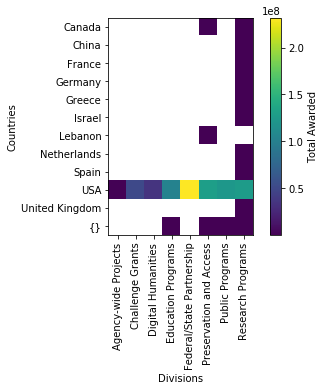

In [173]:
fig, ax = plt.subplots()

sm = ax.imshow(mat.values)

ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_ylabel("Countries")

ax.set_xticks(range(len(divisions)))
ax.set_xticklabels(divisions, rotation=90)
ax.set_xlabel("Divisions")

cb = fig.colorbar(sm)
cb.set_label("Total Awarded")

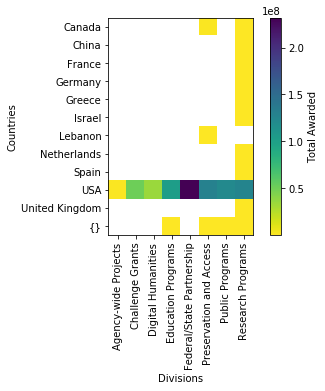

In [175]:
import matplotlib.cm as mcm

fig, ax = plt.subplots()

sm = ax.imshow(mat.values, cmap=mcm.viridis_r)

ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_ylabel("Countries")

ax.set_xticks(range(len(divisions)))
ax.set_xticklabels(divisions, rotation=90)
ax.set_xlabel("Divisions")

cb = fig.colorbar(sm)
cb.set_label("Total Awarded")

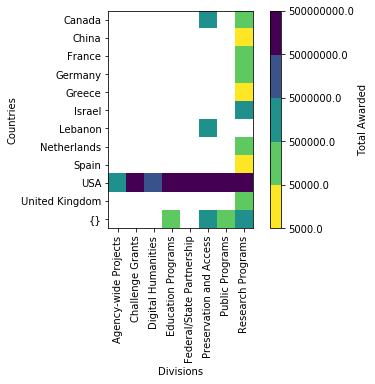

In [188]:
import matplotlib.colors as mcolors

cmap = mcm.viridis_r
bounds = [5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()

sm = ax.imshow(mat.values, cmap=cmap, norm=norm)

ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_ylabel("Countries")

ax.set_xticks(range(len(divisions)))
ax.set_xticklabels(divisions, rotation=90)
ax.set_xlabel("Divisions")

cb = fig.colorbar(sm)
cb.set_label("Total Awarded")
cb.set_ticks(bounds)
cb.set_ticklabels(bounds)